# NYC: One family dwellings
One family houses make almost 11% of the entire NYC real estate market. 
Let's dive deep into the most popular category of the housing market.

In [27]:
# import libraries

import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# load file
nyc = pd.read_csv('./nycsales2.csv', sep =',')

DATA OVERVIEW

In [28]:
#show dataset details
print('number of entries:',nyc.shape)
nyc.dtypes

number of entries: (84548, 22)


Unnamed: 0                         object
BOROUGH                           float64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
TOTAL UNITS                       float64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE         float64
BUILDING CLASS AT TIME OF SALE     object
SALEPRICE                         float64
SALE DATE                          object
dtype: object

In [29]:
nyc.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALEPRICE', 'SALE DATE'],
      dtype='object')

In [30]:
#size of the entire real estate markert
nyc['SALEPRICE'].sum()

77979058860.0

DATA CLEANING AND PREPARATION

In [31]:
# Look for irrelevant data to drop
nyc['SALEPRICE'].value_counts().head(10)

0.0         23114
10.0          752
600000.0      348
650000.0      341
550000.0      338
700000.0      334
450000.0      330
400000.0      314
750000.0      308
500000.0      299
Name: SALEPRICE, dtype: int64

In [32]:
# The 0$, 1$, 10$ transactions are most like transfers of deeds between parties, not a mistake
# They have to be dropped, not to distort the image of the market

nyc = nyc[nyc.SALEPRICE > 1000]
print('number of entries:',nyc.shape)

number of entries: (43589, 22)


In [33]:
# Dicard rows with empty (NaN) fields

nyc.isnull().any()
nyc = nyc.dropna()
nyc.shape

(43589, 22)

In [34]:
# Discard duplicates

nyc.drop_duplicates()
nyc.shape

(43589, 22)

In [35]:
#Set SALE DATE as index ID for sorting purposes
#nyc.date.dt.month
nyc['SALE DATE'].dtype
pd.to_datetime(nyc['SALE DATE'])
nyc['date'] = nyc['SALE DATE']

nyc.date.to_string()
nyc['date'] = nyc['date'].astype(str).str[0: 7]

In [36]:
# Check how the DF looks like
nyc.set_index('SALE DATE', inplace=True)
nyc.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,date
SALE DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-19 00:00:00,4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,...,5.0,0.0,5.0,1633.0,6440.0,1900.0,2.0,C2,6625000.0,2017-07
2016-09-23 00:00:00,7,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,,C4,154 EAST 7TH STREET,...,10.0,0.0,10.0,2272.0,6794.0,1913.0,2.0,C4,3936272.0,2016-09
2016-11-17 00:00:00,8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,,C2,301 EAST 10TH STREET,...,6.0,0.0,6.0,2369.0,4615.0,1900.0,2.0,C2,8000000.0,2016-11


In [37]:
# Change borough index to borough real name

nyc['BOROUGH'][nyc['BOROUGH'] == 1] = 'Manhattan'
nyc['BOROUGH'][nyc['BOROUGH'] == 2] = 'Bronx'
nyc['BOROUGH'][nyc['BOROUGH'] == 3] = 'Brooklyn'
nyc['BOROUGH'][nyc['BOROUGH'] == 4] = 'Queens'
nyc['BOROUGH'][nyc['BOROUGH'] == 5] = 'Staten Island'


C:\Users\info\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\info\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\info\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\info\Anaconda3\lib\s

In [38]:
#Set index data dype to date
nyc.index = pd.to_datetime(nyc.index) 
nyc.index

DatetimeIndex(['2017-07-19', '2016-09-23', '2016-11-17', '2016-09-23',
               '2016-11-07', '2016-10-17', '2017-06-21', '2017-06-21',
               '2016-10-13', '2017-08-09',
               ...
               '2017-08-04', '2017-01-19', '2016-10-18', '2016-10-31',
               '2016-12-07', '2016-11-28', '2017-04-21', '2017-07-05',
               '2016-12-21', '2016-10-27'],
              dtype='datetime64[ns]', name='SALE DATE', length=43589, freq=None)

TOP DOWN APPROACH TO SPOT DETAILS IN THE DATA SET

In [39]:
#Divide cleaned data into 2017 monthly data sets

sep = nyc.loc['2016-9-1':'2016-9-30']
oct = nyc.loc['2016-10-1':'2016-10-31']
nov = nyc.loc['2016-11-1':'2016-11-30']
dec = nyc.loc['2016-12-1':'2016-12-31']
jan = nyc.loc['2017-1-1':'2017-1-31']
feb = nyc.loc['2017-2-1':'2017-2-28']
mar = nyc.loc['2017-3-1':'2017-3-31']
apr = nyc.loc['2017-4-1':'2017-4-30']
may = nyc.loc['2017-5-1':'2017-5-31']
jun = nyc.loc['2017-6-1':'2017-6-30']
jul = nyc.loc['2017-7-1':'2017-7-31']
aug = nyc.loc['2017-8-1':'2017-8-31']


In [40]:
months = ['Sep 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17']
print(months)

monthly_nyc = [(len(sep)), (len(oct)), (len(nov)), (len(dec)), (len(jan)), (len(feb)), (len(mar)),(len(apr)), (len(may)), (len(jun)), (len(jul)), (len(aug)),]
print(monthly_nyc)

xt = range(0,12,1)


['Sep 16', 'Oct 16', 'Nov 16', 'Dec 16', 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17']
[4001, 3316, 3505, 4057, 3496, 3228, 3961, 3355, 3810, 4393, 3480, 2987]


PRESENT FINDINGS

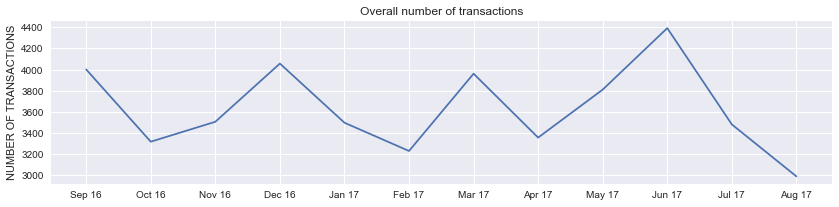

In [29]:
plt.figure(figsize=(14,3))
plt.plot(monthly_nyc)
plt.xticks(xt, months)
plt.title('Overall number of transactions')
plt.ylabel('NUMBER OF TRANSACTIONS')
# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)


In [30]:
#Let's see which building class makes the most of market share:
nyc['BUILDING CLASS CATEGORY'].value_counts().head(10)

01 ONE FAMILY DWELLINGS                        12692
13 CONDOS - ELEVATOR APARTMENTS                10260
02 TWO FAMILY DWELLINGS                         9856
03 THREE FAMILY DWELLINGS                       2321
07 RENTALS - WALKUP APARTMENTS                  1746
04 TAX CLASS 1 CONDOS                           1242
15 CONDOS - 2-10 UNIT RESIDENTIAL               1033
12 CONDOS - WALKUP APARTMENTS                    658
05 TAX CLASS 1 VACANT LAND                       490
22 STORE BUILDINGS                               475
Name: BUILDING CLASS CATEGORY, dtype: int64

One family dwellings are most frequently sold in NY.

In [31]:
#Let's investigate that deeper and split it into monthly transtactions.
nyc_dwellings = nyc['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
NYC_D = nyc[nyc_dwellings]
sep_dwellings = sep['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
SEP = sep[sep_dwellings]
oct_dwellings = oct['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
OCT = oct[oct_dwellings]
nov_dwellings = nov['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
NOV = nov[nov_dwellings]
dec_dwellings = dec['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
DEC = dec[dec_dwellings]
jan_dwellings = jan['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
JAN = jan[jan_dwellings]
jan_dwellings = jan['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
JAN = jan[jan_dwellings]
feb_dwellings = feb['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
FEB = feb[feb_dwellings]
mar_dwellings = mar['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
MAR = mar[mar_dwellings]
apr_dwellings = apr['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
APR = apr[apr_dwellings]
may_dwellings = may['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
MAY = may[may_dwellings]
jun_dwellings = jun['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
JUN = jun[jun_dwellings]
jul_dwellings = jul['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
JUL = jul[jul_dwellings]
aug_dwellings = aug['BUILDING CLASS CATEGORY'].str.contains('01 ONE FAMILY DWELLINGS')
AUG = aug[aug_dwellings]

dwellings_monthly = [(len(SEP)), (len(OCT)), (len(NOV)), (len(DEC)), (len(JAN)), (len(FEB)), (len(MAR)), (len(APR)), (len(MAY)), (len(JUN)), (len(JUL)), (len(AUG))]
print('Number of one family dwellings transactions per month')
print('JAN:', len(JAN))
print('FEB:', len(FEB))
print('MAR:', len(MAR))
print('APR:', len(APR))
print('MAY:', len(MAY))
print('JUN:', len(JUN))
print('JUL:', len(JUL))
print('AUG:', len(AUG))

SEP['SALEPRICE'] = SEP['SALEPRICE']/1000000
OCT['SALEPRICE'] = OCT['SALEPRICE']/1000000
NOV['SALEPRICE'] = NOV['SALEPRICE']/1000000
DEC['SALEPRICE'] = DEC['SALEPRICE']/1000000
JAN['SALEPRICE'] = JAN['SALEPRICE']/1000000
FEB['SALEPRICE'] = FEB['SALEPRICE']/1000000
MAR['SALEPRICE'] = MAR['SALEPRICE']/1000000
APR['SALEPRICE'] = APR['SALEPRICE']/1000000
MAY['SALEPRICE'] = MAY['SALEPRICE']/1000000
JUN['SALEPRICE'] = JUN['SALEPRICE']/1000000
JUL['SALEPRICE'] = JUL['SALEPRICE']/1000000
AUG['SALEPRICE'] = AUG['SALEPRICE']/1000000

Number of one family dwellings transactions per month
JAN: 1010
FEB: 944
MAR: 1131
APR: 959
MAY: 1088
JUN: 1227
JUL: 1008
AUG: 831


C:\Users\info\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\info\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\info\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [32]:
NYC_D['SALEPRICE'].sum()
NYC_D.head(100)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,date
SALE DATE,,,,,,,,,,,,,,,,,,,,,
2016-12-30,210,Manhattan,CHELSEA,01 ONE FAMILY DWELLINGS,1,771.0,52.0,,A9,224 WEST 22ND STREET,...,1.0,0.0,1.0,1975.0,3855.0,1901.0,1.0,A9,7425000.0,2016-12
2016-11-22,3537,Manhattan,GREENWICH VILLAGE-CENTRAL,01 ONE FAMILY DWELLINGS,1,525.0,34.0,,S1,168 THOMPSON STREET,...,1.0,1.0,2.0,1350.0,5807.0,1900.0,1.0,S1,9999999.0,2016-11
2016-09-09,3538,Manhattan,GREENWICH VILLAGE-CENTRAL,01 ONE FAMILY DWELLINGS,1,526.0,51.0,,A4,88 MACDOUGAL STREET,...,1.0,0.0,1.0,2002.0,3556.0,1899.0,1.0,A4,12500000.0,2016-09
2017-06-22,3539,Manhattan,GREENWICH VILLAGE-CENTRAL,01 ONE FAMILY DWELLINGS,1,526.0,66.0,,A4,186 SULLIVAN STREET,...,1.0,0.0,1.0,2252.0,3960.0,1899.0,1.0,A4,14000000.0,2017-06
2016-09-19,3541,Manhattan,GREENWICH VILLAGE-CENTRAL,01 ONE FAMILY DWELLINGS,1,552.0,50.0,,A4,116 WAVERLY PLACE,...,1.0,0.0,1.0,2138.0,7000.0,1900.0,1.0,A4,20650000.0,2016-09
2017-06-06,3542,Manhattan,GREENWICH VILLAGE-CENTRAL,01 ONE FAMILY DWELLINGS,1,568.0,10.0,,A4,14 EAST 11TH STREET,...,1.0,0.0,1.0,1976.0,6202.0,1900.0,1.0,A4,21000000.0,2017-06
2016-10-07,3543,Manhattan,GREENWICH VILLAGE-CENTRAL,01 ONE FAMILY DWELLINGS,1,574.0,27.0,,S1,34 WEST 11TH STREET,...,1.0,1.0,2.0,2085.0,4488.0,1899.0,1.0,S1,11800000.0,2016-10
2017-07-07,3544,Manhattan,GREENWICH VILLAGE-CENTRAL,01 ONE FAMILY DWELLINGS,1,575.0,124.0,,A5,62 WEST 12TH STREET,...,1.0,0.0,1.0,1996.0,3200.0,1901.0,1.0,A5,9500000.0,2017-07
2017-08-15,4175,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,584.0,31.0,,A4,75 BEDFORD STREET,...,1.0,0.0,1.0,1640.0,2400.0,1901.0,1.0,A4,7800000.0,2017-08


In [37]:
#comparison: 10 most expensive houses in Bronx

NYC_Bronx_top10 = NYC_D[NYC_D['BOROUGH']== 'Bronx'].sort_values(by='SALEPRICE', ascending=0)
NYC_Bronx_top10.head(10).sort_values(by='SALEPRICE', ascending=0)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,date
SALE DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-27,2989,Bronx,MORRISANIA/LONGWOOD,01 ONE FAMILY DWELLINGS,1,2609.0,41.0,,A9,1193 FULTON AVENUE,...,1.0,0.0,1.0,8316.0,2268.0,1899.0,1.0,A9,12303058.0,2017-07
2017-01-09,1815,Bronx,FIELDSTON,01 ONE FAMILY DWELLINGS,1,5837.0,3710.0,,A7,360 WEST 253RD STREET,...,1.0,0.0,1.0,102862.0,9590.0,1912.0,1.0,A7,6250000.0,2017-01
2016-09-15,1800,Bronx,FIELDSTON,01 ONE FAMILY DWELLINGS,1,5811.0,250.0,,A3,4547 LIVINGSTON AVENUE,...,1.0,0.0,1.0,18375.0,6378.0,1930.0,1.0,A3,3900000.0,2016-09
2017-06-22,1803,Bronx,FIELDSTON,01 ONE FAMILY DWELLINGS,1,5812.0,60.0,,A3,4595 FIELDSTON ROAD,...,1.0,0.0,1.0,13170.0,3594.0,1920.0,1.0,A3,3075000.0,2017-06
2016-10-28,4434,Bronx,RIVERDALE,01 ONE FAMILY DWELLINGS,1,5937.0,499.0,,A3,5253 SYCAMORE AVENUE,...,1.0,0.0,1.0,12200.0,3000.0,1910.0,1.0,A3,2942500.0,2016-10
2017-05-16,4433,Bronx,RIVERDALE,01 ONE FAMILY DWELLINGS,1,5933.0,34.0,,A3,5475 PALISADE AVENUE,...,1.0,0.0,1.0,28616.0,2203.0,1920.0,1.0,A3,2400000.0,2017-05
2017-05-24,4436,Bronx,RIVERDALE,01 ONE FAMILY DWELLINGS,1,5939.0,396.0,,A3,5294 SYCAMORE AVENUE,...,1.0,0.0,1.0,8400.0,2813.0,1920.0,1.0,A3,2320000.0,2017-05
2017-08-24,1807,Bronx,FIELDSTON,01 ONE FAMILY DWELLINGS,1,5818.0,2075.0,,A3,305 WEST 246TH STREET,...,1.0,0.0,1.0,10153.0,3769.0,1920.0,1.0,A3,2300000.0,2017-08
2016-11-30,4397,Bronx,RIVERDALE,01 ONE FAMILY DWELLINGS,1,5749.0,690.0,,A3,3101 HENRY HUDSON PKWY W,...,1.0,0.0,1.0,13804.0,3505.0,1910.0,1.0,A3,2000000.0,2016-11


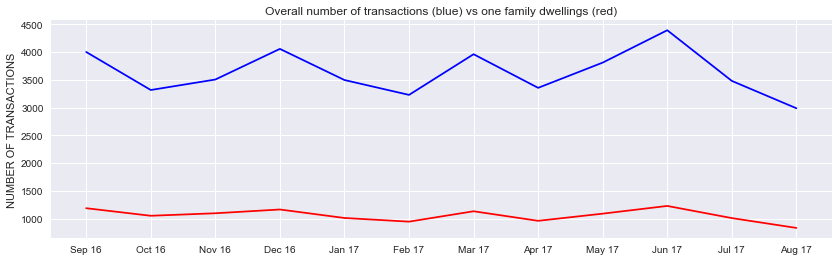

In [25]:
plt.figure(figsize=(14,4))
plt.plot(monthly_nyc, 'b')
plt.plot(dwellings_monthly, 'r')
plt.xticks(xt, months)
plt.title('Overall number of transactions (blue) vs one family dwellings (red)')
plt.ylabel('NUMBER OF TRANSACTIONS')
plt.savefig("test1.png")

In [26]:
JAN.groupby('BOROUGH').SALEPRICE.describe()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,,,,,,,,
Bronx,74.0,0.463918,0.703240,0.045,0.325075,0.37250,0.434416,6.250000
Brooklyn,192.0,0.860741,0.785447,0.005,0.440000,0.60250,0.928513,6.129000
Manhattan,10.0,10.578876,11.948840,0.200,3.411250,6.89906,13.558910,41.000000
Queens,442.0,0.601799,0.277252,0.005,0.412000,0.54700,0.780000,1.840000
Staten Island,292.0,0.476833,0.200162,0.003,0.350000,0.45000,0.560653,1.349181


In [27]:
FEB.groupby('BOROUGH').SALEPRICE.mean()

BOROUGH
Bronx             0.386649
Brooklyn          1.093990
Manhattan        13.471250
Queens            0.597563
Staten Island     0.475589
Name: SALEPRICE, dtype: float64

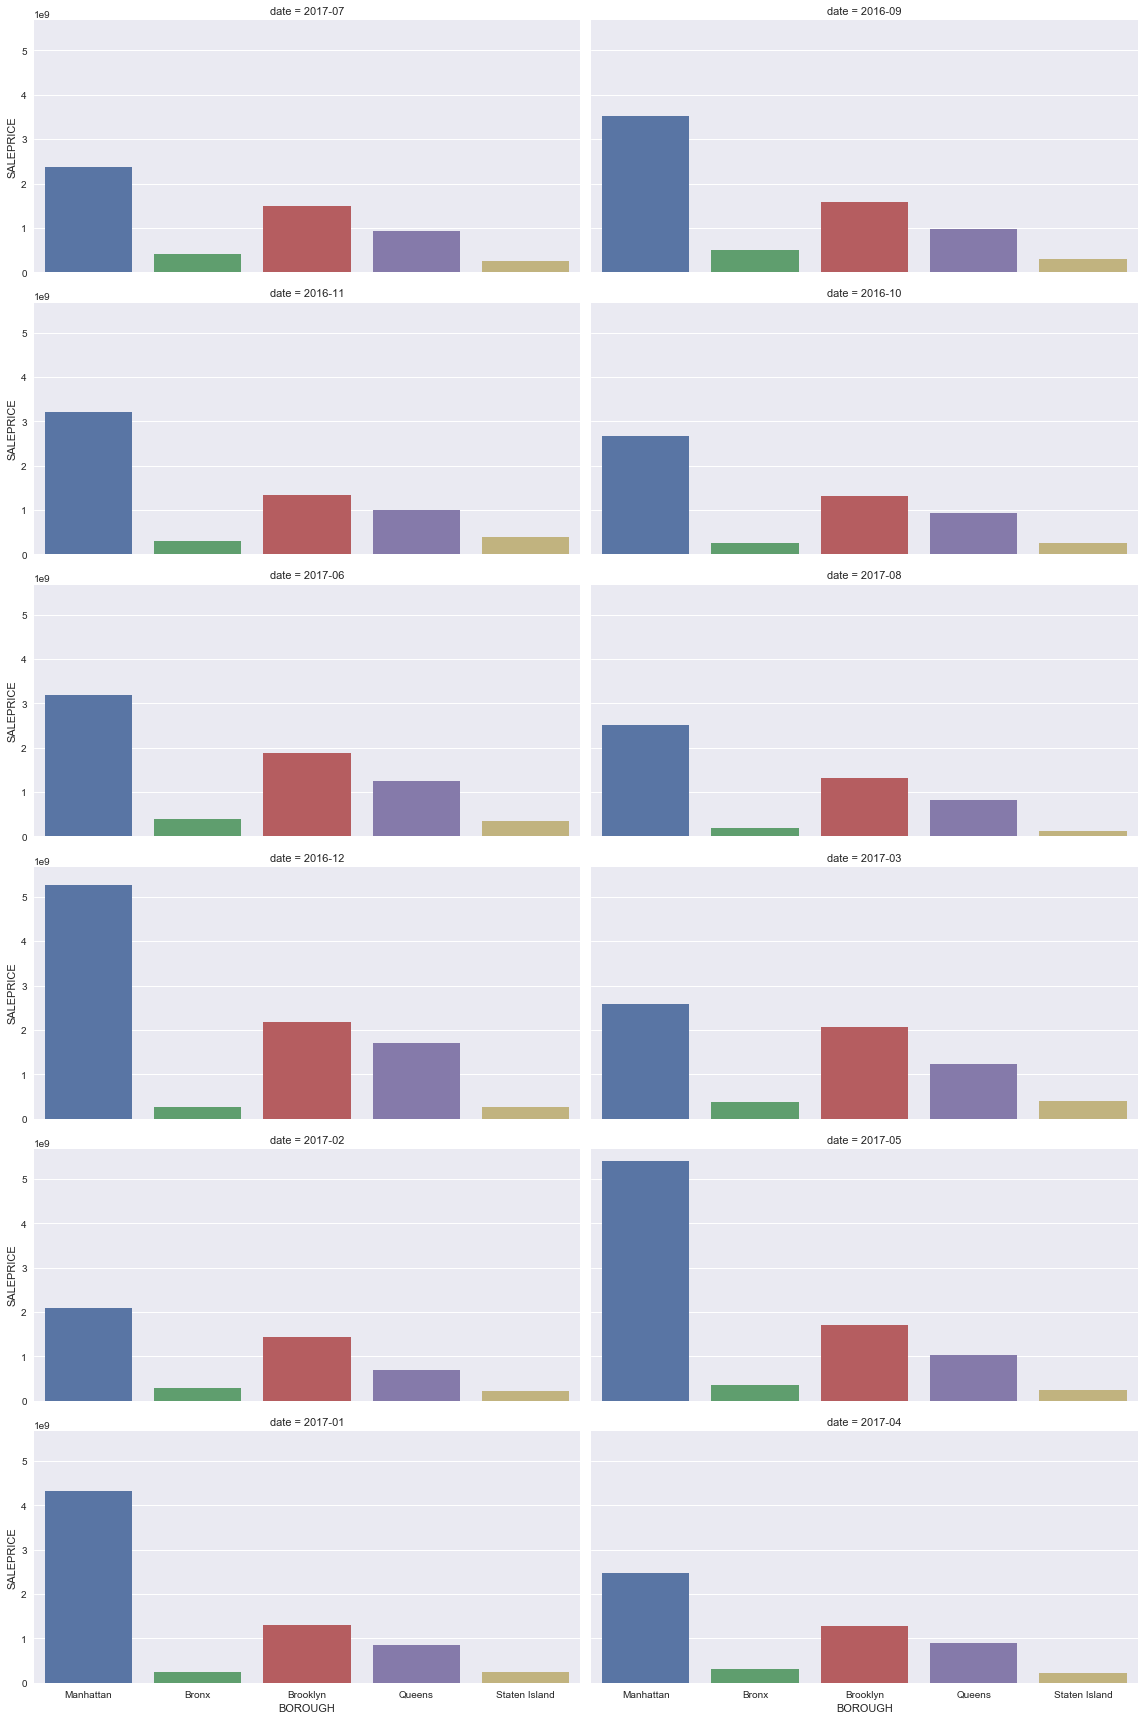

In [134]:
sns.factorplot(x='BOROUGH', y='SALEPRICE', col='date', data=nyc, aspect=2, kind='bar', col_wrap=2, estimator=sum, ci=False)

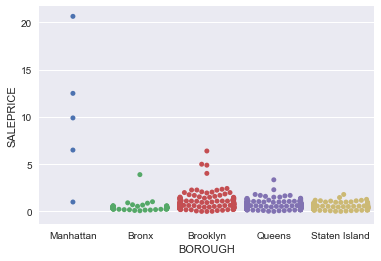

In [66]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=SEP)
plt.savefig("saleprice09.png")

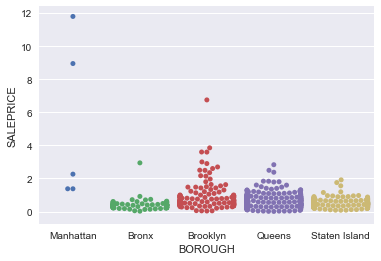

In [67]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=OCT)
plt.savefig("saleprice10.png")

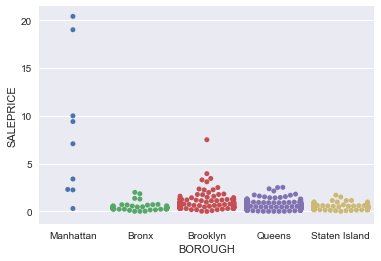

In [68]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=NOV)
plt.savefig("saleprice11.png")

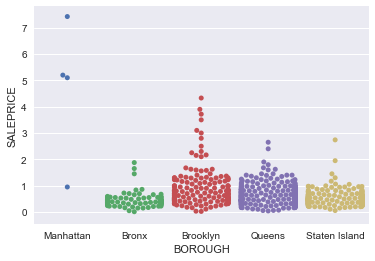

In [69]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=DEC)
plt.savefig("saleprice12.png")

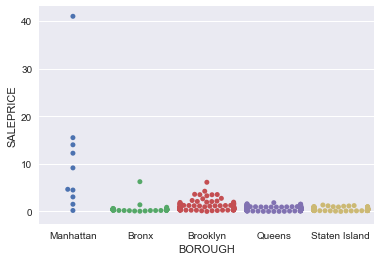

In [70]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=JAN)
plt.savefig("saleprice01.png")

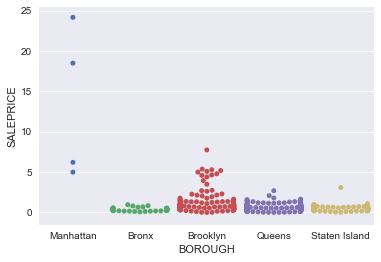

In [71]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=FEB)
plt.savefig("saleprice02.png")

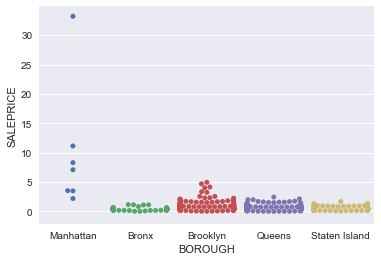

In [72]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=MAR)
plt.savefig("saleprice03.png")

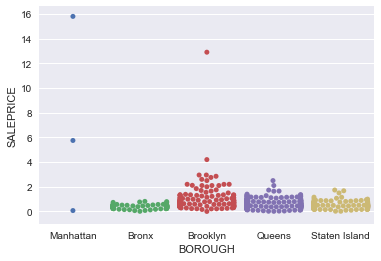

In [73]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=APR)
plt.savefig("saleprice04.png")

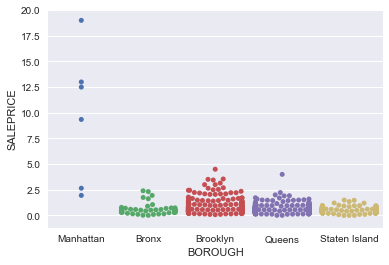

In [74]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=MAY)
plt.savefig("saleprice05.png")

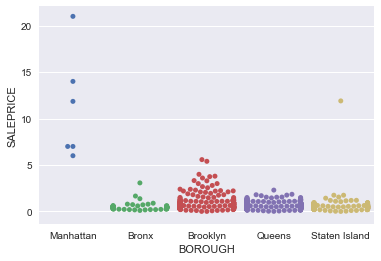

In [75]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=JUN)
plt.savefig("saleprice06.png")

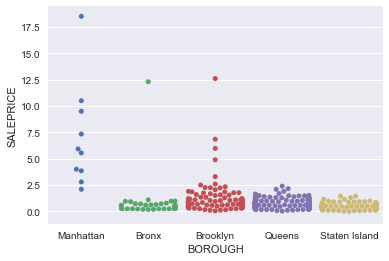

In [76]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=JUL)
plt.savefig("saleprice07.png")

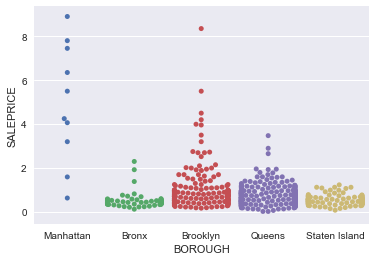

In [77]:
ax = sns.swarmplot(x='BOROUGH', y='SALEPRICE', data=AUG)
plt.savefig("saleprice08.png")

In [39]:
sales_monthly = [(JAN['SALEPRICE'].sum()), 
                 (FEB['SALEPRICE'].sum()), 
                 (MAR['SALEPRICE'].sum()), 
                 (APR['SALEPRICE'].sum()),
                 (MAY['SALEPRICE'].sum()),
                 (JUN['SALEPRICE'].sum()),
                 (JUL['SALEPRICE'].sum()),
                 (AUG['SALEPRICE'].sum())]

mean_monthly = [(JAN['SALEPRICE'].mean()), 
                 (FEB['SALEPRICE'].mean()), 
                 (MAR['SALEPRICE'].mean()), 
                 (APR['SALEPRICE'].mean()),
                 (MAY['SALEPRICE'].mean()),
                 (JUN['SALEPRICE'].mean()),
                 (JUL['SALEPRICE'].mean()),
                 (AUG['SALEPRICE'].mean())]

print(sales_monthly)
print(mean_monthly)

[710.6116199999996, 651.156512999999, 735.9434750000011, 599.9631279999999, 740.1740269999999, 862.6121019999993, 719.1505710000002, 644.1293059999992]
[0.7035758613861381, 0.689784441737287, 0.6507015694076048, 0.6256132721584983, 0.680307010110294, 0.7030253480032593, 0.7134430267857145, 0.7751255186522253]


In [40]:
JAN.groupby('BOROUGH').SALEPRICE.sum()

BOROUGH
Bronx             34.329932
Brooklyn         165.262295
Manhattan        105.788760
Queens           265.995362
Staten Island    139.235271
Name: SALEPRICE, dtype: float64

In [41]:
print('JAN:')
print(JAN['BOROUGH'].value_counts())
print('FEB:')
print(FEB['BOROUGH'].value_counts())
print('MAR:')
print(MAR['BOROUGH'].value_counts())
print('APR:')
print(APR['BOROUGH'].value_counts())
print('MAY:')
print(MAY['BOROUGH'].value_counts())
print('JUN:')
print(JUN['BOROUGH'].value_counts())
print('JUL:')
print(JUL['BOROUGH'].value_counts())
print('AUG:')
print(AUG['BOROUGH'].value_counts())

JAN:
Queens           442
Staten Island    292
Brooklyn         192
Bronx             74
Manhattan         10
Name: BOROUGH, dtype: int64
FEB:
Queens           428
Staten Island    262
Brooklyn         170
Bronx             80
Manhattan          4
Name: BOROUGH, dtype: int64
MAR:
Queens           504
Staten Island    324
Brooklyn         205
Bronx             91
Manhattan          7
Name: BOROUGH, dtype: int64
APR:
Queens           417
Staten Island    276
Brooklyn         169
Bronx             94
Manhattan          3
Name: BOROUGH, dtype: int64
MAY:
Queens           491
Staten Island    306
Brooklyn         202
Bronx             83
Manhattan          6
Name: BOROUGH, dtype: int64
JUN:
Queens           550
Staten Island    343
Brooklyn         241
Bronx             87
Manhattan          6
Name: BOROUGH, dtype: int64
JUL:
Queens           468
Staten Island    296
Brooklyn         164
Bronx             70
Manhattan         10
Name: BOROUGH, dtype: int64
AUG:
Queens           445
Brooklyn

In [42]:
#Let's build a data frame showing number of transactions in Boroughs in different months

JAN_list = JAN['BOROUGH'].value_counts().tolist()
FEB_list = FEB['BOROUGH'].value_counts().tolist()
MAR_list = MAR['BOROUGH'].value_counts().tolist()
APR_list = APR['BOROUGH'].value_counts().tolist()
MAY_list = MAY['BOROUGH'].value_counts().tolist()
JUN_list = JUN['BOROUGH'].value_counts().tolist()
JUL_list = JUL['BOROUGH'].value_counts().tolist()
AUG_list = AUG['BOROUGH'].value_counts().tolist()

In [43]:
#list of Boroughs for our table
BOROUGH = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']

In [44]:
#building the aggregated table from all monthly lists
borough_sales = pd.DataFrame(
    {'BOROUGH': BOROUGH,
     'SEPTEMBER 2016': SEP['BOROUGH'].value_counts().sort_index(),
     'OCTOBER 2016': OCT['BOROUGH'].value_counts().sort_index(),
     'NOVEMBER 2016': NOV['BOROUGH'].value_counts().sort_index(),
     'DECEMBER 2016': DEC['BOROUGH'].value_counts().sort_index(),
     'JANUARY 2017': JAN['BOROUGH'].value_counts().sort_index(),
    'FEBRUARY 2017': FEB['BOROUGH'].value_counts().sort_index(),
    'MARCH 2017': MAR['BOROUGH'].value_counts().sort_index(),
    'APRIL 2017': APR['BOROUGH'].value_counts().sort_index(),
    'MAY 2017': MAY['BOROUGH'].value_counts().sort_index(),
    'JUNE 2017': JUN['BOROUGH'].value_counts().sort_index(),
    'JULY 2017': JUL['BOROUGH'].value_counts().sort_index(),
    'AUGUST 2017' : AUG['BOROUGH'].value_counts().sort_index(),
    }, columns = ['SEPTEMBER 2016', 'OCTOBER 2016', 'NOVEMBER 2016', 'DECEMBER 2016', 'JANUARY 2017','FEBRUARY 2017','MARCH 2017','APRIL 2017', 'MAY 2017', 'JUNE 2017','JULY 2017','AUGUST 2017','BOROUGH'])
borough_sales.set_index('BOROUGH', inplace=True)
borough_sales.head()

,SEPTEMBER 2016,OCTOBER 2016,NOVEMBER 2016,DECEMBER 2016,JANUARY 2017,FEBRUARY 2017,MARCH 2017,APRIL 2017,MAY 2017,JUNE 2017,JULY 2017,AUGUST 2017
BOROUGH,,,,,,,,,,,,
Bronx,93,97,88,96,74,80,91,94,83,87,70,66
Brooklyn,230,161,193,192,192,170,205,169,202,241,164,169
Manhattan,5,5,9,4,10,4,7,3,6,6,10,10
Queens,516,503,483,542,442,428,504,417,491,550,468,445
Staten Island,342,284,322,329,292,262,324,276,306,343,296,141


In [45]:
nyc_totals = NYC_D.groupby('BOROUGH').SALEPRICE.sum().sort_index()
print(nyc_totals)

nyc_counts = NYC_D['BOROUGH'].value_counts().sort_index()
print(nyc_counts)

nyc_totals = NYC_D.groupby('BOROUGH').SALEPRICE.sum().sort_index().tolist()
print(nyc_totals)

nyc_counts = NYC_D['BOROUGH'].value_counts().sort_index().tolist()
print(nyc_counts)

BOROUGH
Bronx            4.655640e+08
Brooklyn         2.099223e+09
Manhattan        6.644837e+08
Queens           3.553671e+09
Staten Island    1.737593e+09
Name: SALEPRICE, dtype: float64
Bronx            1019
Brooklyn         2288
Manhattan          79
Queens           5789
Staten Island    3517
Name: BOROUGH, dtype: int64
[465564039.0, 2099222820.0, 664483741.0, 3553671497.0, 1737593210.0]
[1019, 2288, 79, 5789, 3517]


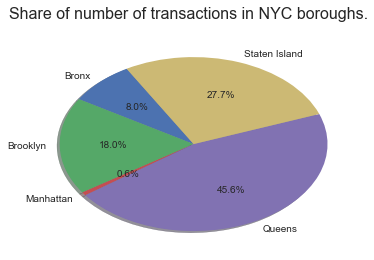

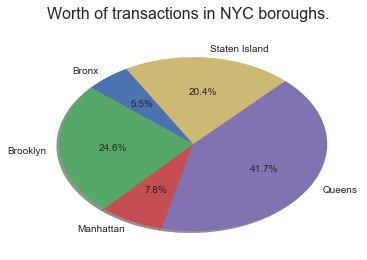

In [46]:
plt.figure()
plt.suptitle('Share of number of transactions in NYC boroughs.', fontsize=16)
values = [1019, 2288, 79, 5789, 3517] 
labels = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'] 
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=120)
plt.show()
plt.savefig("share_numbers.jpg")

plt.figure()
plt.suptitle('Worth of transactions in NYC boroughs.', fontsize=16)
values = [465564039.0, 2099222820.0, 664483741.0, 3553671497.0, 1737593210.0] 
labels = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'] 
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=120)
plt.show()
plt.savefig("share_worth.jpg")

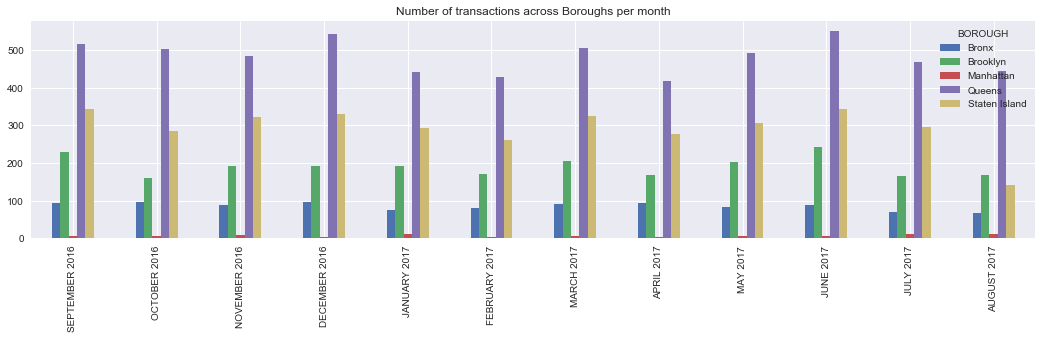

In [161]:
borough_sales.T.plot(kind='bar', title='Number of transactions across Boroughs per month', figsize=(18, 4))
plt.savefig("monthly_numbers.png")

In [158]:
borough_value = pd.DataFrame(
    {'BOROUGH': BOROUGH,
     'SEPTEMBER 2016': SEP.groupby('BOROUGH').SALEPRICE.sum(),
     'OCTOBER 2016': OCT.groupby('BOROUGH').SALEPRICE.sum(),
     'NOVEMBER 2016': NOV.groupby('BOROUGH').SALEPRICE.sum(),
     'DECEMBER 2016': DEC.groupby('BOROUGH').SALEPRICE.sum(),
     'JANUARY 2017': JAN.groupby('BOROUGH').SALEPRICE.sum(),
    'FEBRUARY 2017': FEB.groupby('BOROUGH').SALEPRICE.sum(),
    'MARCH 2017': MAR.groupby('BOROUGH').SALEPRICE.sum(),
    'APRIL 2017': APR.groupby('BOROUGH').SALEPRICE.sum(),
    'MAY 2017': MAY.groupby('BOROUGH').SALEPRICE.sum(),
    'JUNE 2017': JUN.groupby('BOROUGH').SALEPRICE.sum(),
    'JULY 2017': JUL.groupby('BOROUGH').SALEPRICE.sum(),
    'AUGUST 2017': AUG.groupby('BOROUGH').SALEPRICE.sum(),
    }, columns = ['SEPTEMBER 2016', 'OCTOBER 2016', 'NOVEMBER 2016', 'DECEMBER 2016', 'JANUARY 2017','FEBRUARY 2017','MARCH 2017','APRIL 2017', 'MAY 2017', 'JUNE 2017','JULY 2017','AUGUST 2017','BOROUGH'])
borough_value.set_index('BOROUGH', inplace=True)
borough_value.head()

,SEPTEMBER 2016,OCTOBER 2016,NOVEMBER 2016,DECEMBER 2016,JANUARY 2017,FEBRUARY 2017,MARCH 2017,APRIL 2017,MAY 2017,JUNE 2017,JULY 2017,AUGUST 2017
BOROUGH,,,,,,,,,,,,
Bronx,41.198227,38.575044,39.240766,42.949725,34.329932,30.931918,37.748429,36.591792,43.795490,42.559319,43.781258,33.862139
Brooklyn,191.295348,140.375926,158.380339,166.464947,165.262295,185.978244,177.137595,161.510231,190.347284,220.616494,164.144349,177.709768
Manhattan,50.550000,25.760000,74.127241,18.675000,105.788760,53.885000,68.964450,21.622500,58.450000,66.850000,70.065000,49.745790
Queens,320.371334,304.183306,295.102347,328.958854,265.995362,255.757113,294.199523,246.788978,294.599541,343.075027,298.805495,305.834617
Staten Island,163.735104,141.565777,152.153988,163.131292,139.235271,124.604238,157.893478,133.449627,152.981712,189.511262,142.354469,76.976992


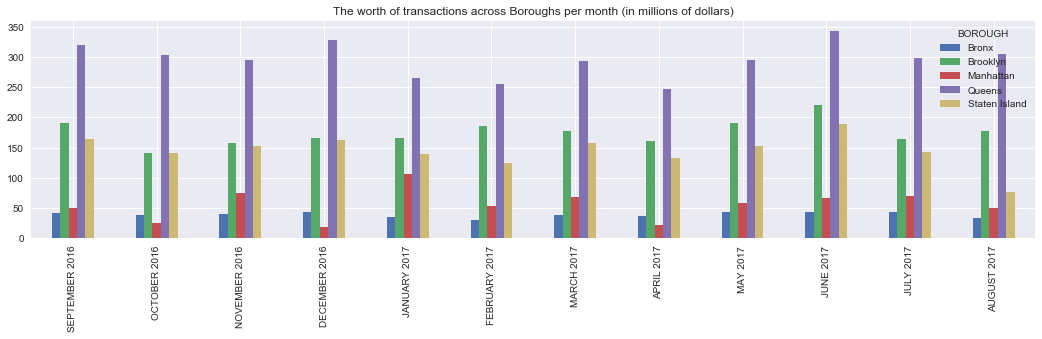

In [160]:
borough_value.T.plot(kind='bar', title='The worth of transactions across Boroughs per month (in millions of dollars)', figsize=(18, 4))
plt.savefig("monthly_sum.png")

In [164]:
borough_value = pd.DataFrame(
    {'BOROUGH': BOROUGH,
     'SEPTEMBER 2016': SEP.groupby('BOROUGH').SALEPRICE.mean().round(5),
     'OCTOBER 2016': OCT.groupby('BOROUGH').SALEPRICE.mean().round(5),
     'NOVEMBER 2016': NOV.groupby('BOROUGH').SALEPRICE.mean().round(5),
     'DECEMBER 2016': DEC.groupby('BOROUGH').SALEPRICE.mean().round(5),
     'JANUARY 2017': JAN.groupby('BOROUGH').SALEPRICE.mean().round(5),
    'FEBRUARY 2017': FEB.groupby('BOROUGH').SALEPRICE.mean().round(5),
    'MARCH 2017': MAR.groupby('BOROUGH').SALEPRICE.mean().round(5),
    'APRIL 2017': APR.groupby('BOROUGH').SALEPRICE.mean().round(5),
    'MAY 2017': MAY.groupby('BOROUGH').SALEPRICE.mean().round(5),
    'JUNE 2017': JUN.groupby('BOROUGH').SALEPRICE.mean().round(5),
    'JULY 2017': JUL.groupby('BOROUGH').SALEPRICE.mean().round(5),
    'AUGUST 2017': AUG.groupby('BOROUGH').SALEPRICE.mean().round(5),
    }, columns = ['SEPTEMBER 2016', 'OCTOBER 2016', 'NOVEMBER 2016', 'DECEMBER 2016', 'JANUARY 2017','FEBRUARY 2017','MARCH 2017','APRIL 2017','JUNE 2017','JULY 2017','AUGUST 2017','BOROUGH'])
borough_value.set_index('BOROUGH', inplace=True)
borough_value.head()


,SEPTEMBER 2016,OCTOBER 2016,NOVEMBER 2016,DECEMBER 2016,JANUARY 2017,FEBRUARY 2017,MARCH 2017,APRIL 2017,JUNE 2017,JULY 2017,AUGUST 2017
BOROUGH,,,,,,,,,,,
Bronx,0.44299,0.39768,0.44592,0.44739,0.46392,0.38665,0.41482,0.38927,0.48919,0.62545,0.51306
Brooklyn,0.83172,0.87190,0.82062,0.86700,0.86074,1.09399,0.86409,0.95568,0.91542,1.00088,1.05154
Manhattan,10.11000,5.15200,8.23636,4.66875,10.57888,13.47125,9.85206,7.20750,11.14167,7.00650,4.97458
Queens,0.62087,0.60474,0.61098,0.60694,0.60180,0.59756,0.58373,0.59182,0.62377,0.63847,0.68727
Staten Island,0.47876,0.49847,0.47253,0.49584,0.47683,0.47559,0.48733,0.48351,0.55251,0.48093,0.54594


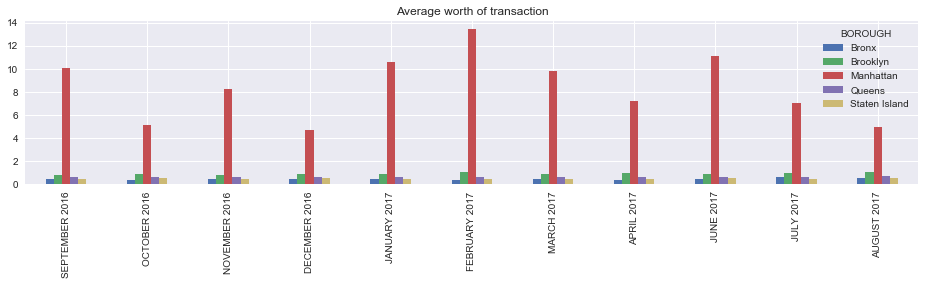

In [165]:
borough_value.T.plot(kind='bar', title='Average worth of transaction', figsize=(16, 3))
plt.savefig("monthly_mean.png")

In [39]:
# total value of tranactions per building category

jan.groupby('BUILDING CLASS CATEGORY').SALEPRICE.sum()

BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                        7.106116e+08
02 TWO FAMILY DWELLINGS                        6.857044e+08
03 THREE FAMILY DWELLINGS                      2.049732e+08
04 TAX CLASS 1 CONDOS                          5.116132e+07
05 TAX CLASS 1 VACANT LAND                     1.976083e+07
06 TAX CLASS 1 - OTHER                         1.055000e+06
07 RENTALS - WALKUP APARTMENTS                 4.321192e+08
08 RENTALS - ELEVATOR APARTMENTS               2.681583e+08
09 COOPS - WALKUP APARTMENTS                   4.500000e+07
10 COOPS - ELEVATOR APARTMENTS                 6.353237e+06
12 CONDOS - WALKUP APARTMENTS                  2.737216e+07
13 CONDOS - ELEVATOR APARTMENTS                1.950956e+09
14 RENTALS - 4-10 UNIT                         3.271908e+07
15 CONDOS - 2-10 UNIT RESIDENTIAL              7.840913e+07
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT     2.268550e+07
21 OFFICE BUILDINGS                            1.763414e+09
22 STORE BUILDIN

In [40]:
# Top Boroughs
jan['BOROUGH'].value_counts()

Brooklyn         1042
Queens           1022
Manhattan         653
Staten Island     493
Bronx             286
Name: BOROUGH, dtype: int64

In [41]:
# Top Neighborhoods
jan['NEIGHBORHOOD'].value_counts().head(20)

FLUSHING-NORTH             119
BEDFORD STUYVESANT          67
TRIBECA                     57
BOROUGH PARK                51
EAST NEW YORK               50
BAYSIDE                     50
ASTORIA                     47
BUSHWICK                    47
MIDTOWN WEST                46
GREAT KILLS                 45
MIDTOWN EAST                45
HARLEM-CENTRAL              45
SPRINGFIELD GARDENS         43
UPPER EAST SIDE (79-96)     43
UPPER EAST SIDE (59-79)     41
FLATBUSH-EAST               41
UPPER WEST SIDE (59-79)     39
DOWNTOWN-FULTON MALL        38
FINANCIAL                   38
CROWN HEIGHTS               37
Name: NEIGHBORHOOD, dtype: int64

In [42]:
# Top Building categories

jan['BUILDING CLASS CATEGORY'].value_counts().head(20)

01 ONE FAMILY DWELLINGS                        1010
13 CONDOS - ELEVATOR APARTMENTS                 843
02 TWO FAMILY DWELLINGS                         808
03 THREE FAMILY DWELLINGS                       188
07 RENTALS - WALKUP APARTMENTS                  131
04 TAX CLASS 1 CONDOS                            96
15 CONDOS - 2-10 UNIT RESIDENTIAL                77
22 STORE BUILDINGS                               52
12 CONDOS - WALKUP APARTMENTS                    51
05 TAX CLASS 1 VACANT LAND                       41
21 OFFICE BUILDINGS                              22
30 WAREHOUSES                                    18
31 COMMERCIAL VACANT LAND                        17
14 RENTALS - 4-10 UNIT                           17
29 COMMERCIAL GARAGES                            16
08 RENTALS - ELEVATOR APARTMENTS                 14
43 CONDO OFFICE BUILDINGS                        13
44 CONDO PARKING                                 13
10 COOPS - ELEVATOR APARTMENTS                   10
46 CONDO STO

In [43]:
# total value of transactions in jan
print(jan['SALEPRICE'].sum())

# total value of tranactions per building category
jan[jan['BUILDING CLASS CATEGORY']=='01 ONE FAMILY DWELLINGS'].LOT.sum()
jan.groupby('BUILDING CLASS CATEGORY').SALEPRICE.sum()

6974212186.0


BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                        7.106116e+08
02 TWO FAMILY DWELLINGS                        6.857044e+08
03 THREE FAMILY DWELLINGS                      2.049732e+08
04 TAX CLASS 1 CONDOS                          5.116132e+07
05 TAX CLASS 1 VACANT LAND                     1.976083e+07
06 TAX CLASS 1 - OTHER                         1.055000e+06
07 RENTALS - WALKUP APARTMENTS                 4.321192e+08
08 RENTALS - ELEVATOR APARTMENTS               2.681583e+08
09 COOPS - WALKUP APARTMENTS                   4.500000e+07
10 COOPS - ELEVATOR APARTMENTS                 6.353237e+06
12 CONDOS - WALKUP APARTMENTS                  2.737216e+07
13 CONDOS - ELEVATOR APARTMENTS                1.950956e+09
14 RENTALS - 4-10 UNIT                         3.271908e+07
15 CONDOS - 2-10 UNIT RESIDENTIAL              7.840913e+07
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT     2.268550e+07
21 OFFICE BUILDINGS                            1.763414e+09
22 STORE BUILDIN

In [48]:
# Top 10 most expensive properties in January 2017
jan.sort_values('SALEPRICE', ascending=False).head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,date
SALE DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-24,2563,Manhattan,FINANCIAL,21 OFFICE BUILDINGS,4,40.0,3.0,,O4,60 WALL STREET,...,0.0,1.0,1.0,53632.0,1617206.0,1987.0,4.0,O4,1.040000e+09,2017-01
2017-01-05,9598,Manhattan,MIDTOWN WEST,21 OFFICE BUILDINGS,4,1026.0,21.0,,O5,1706-1720 BROADWAY,...,0.0,2.0,2.0,8848.0,52150.0,1918.0,4.0,O5,2.681242e+08,2017-01
2017-01-19,7450,Manhattan,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1291.0,21.0,,O6,551 MADISON AVENUE,...,0.0,1.0,1.0,7541.0,125495.0,1922.0,4.0,O6,1.550000e+08,2017-01
2017-01-10,4155,Manhattan,GREENWICH VILLAGE-CENTRAL,21 OFFICE BUILDINGS,4,577.0,19.0,,O5,34-42 W 14 STREET,...,0.0,6.0,6.0,25297.0,151541.0,1930.0,4.0,O5,1.530000e+08,2017-01
2017-01-09,2570,Manhattan,FINANCIAL,26 OTHER HOTELS,4,40.0,16.0,,H3,52 WILLIAM STREET,...,0.0,2.0,2.0,6497.0,119467.0,1902.0,4.0,H3,9.355000e+07,2017-01
2017-01-05,7387,Manhattan,MIDTOWN CBD,13 CONDOS - ELEVATOR APARTMENTS,2,1292.0,1446.0,,R4,432 PARK AVENUE,...,1.0,0.0,1.0,0.0,0.0,2012.0,2.0,R4,6.566176e+07,2017-01
2017-01-05,8910,Manhattan,MIDTOWN WEST,08 RENTALS - ELEVATOR APARTMENTS,2,1026.0,29.0,,D6,201 WEST 54TH STREET,...,23.0,4.0,27.0,5042.0,25248.0,1910.0,2.0,D6,6.239062e+07,2017-01
2017-01-05,9602,Manhattan,MIDTOWN WEST,21 OFFICE BUILDINGS,4,1260.0,64.0,,O6,56 WEST 45TH STREET,...,0.0,62.0,62.0,4016.0,58538.0,1914.0,4.0,O6,5.000000e+07,2017-01
2017-01-26,11769,Manhattan,UPPER EAST SIDE (59-79),09 COOPS - WALKUP APARTMENTS,2,1431.0,1.0,,C6,1329 3 AVENUE,...,0.0,0.0,0.0,0.0,0.0,1910.0,2.0,C6,4.500000e+07,2017-01
